In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [187]:
# считывание файла
df1 = pd.read_csv('ex1.csv')
print(df1.head())

           x           y
0  40.221367   28.074933
1  41.383916  105.179581
2  50.157355  162.764514
3  20.647573  -51.647274
4  50.657121  126.580772


x    float64
y    float64
dtype: object


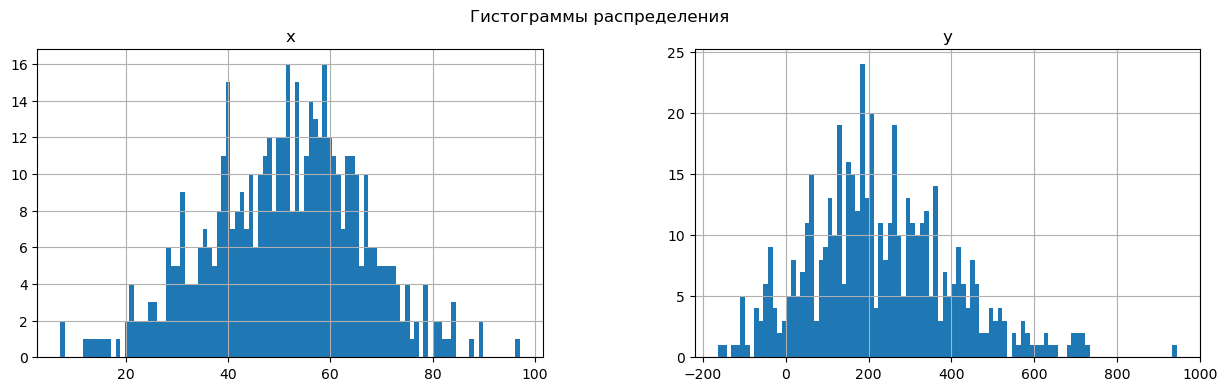

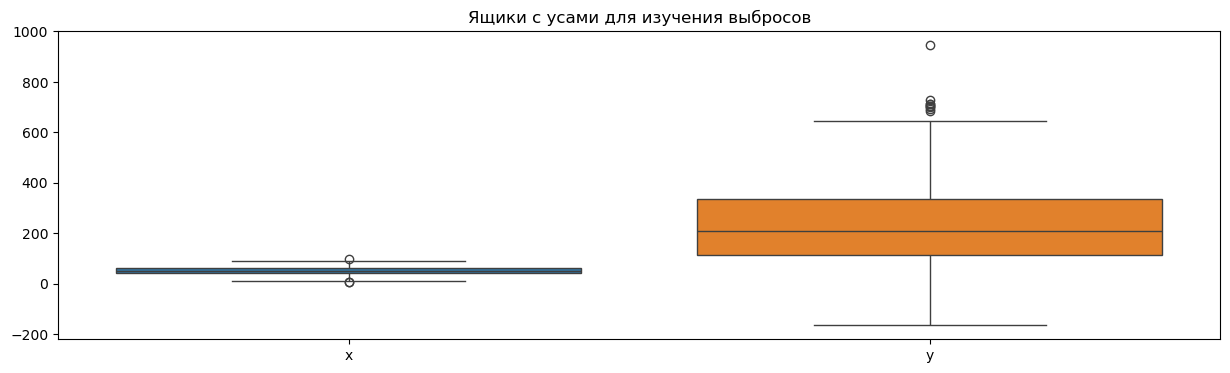

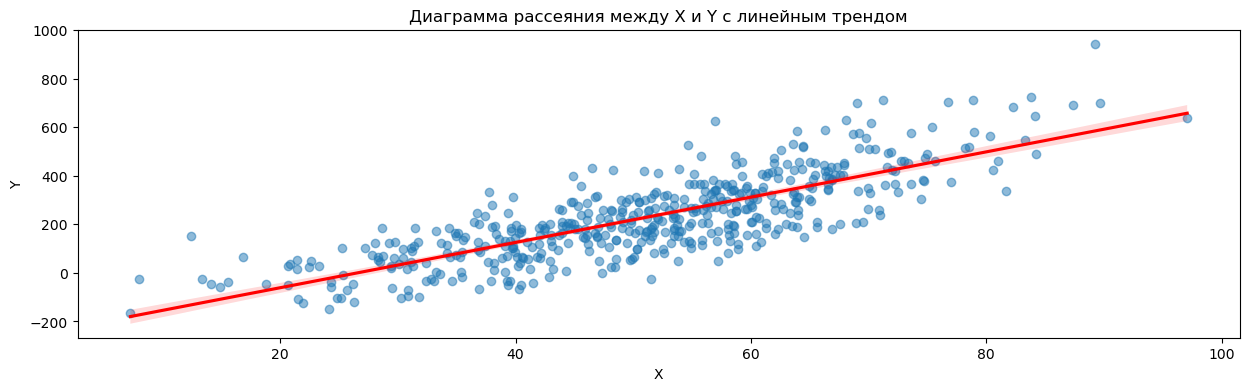

На основе графиков, целесообразно использовать корреляцию Пирсона, так как обе переменные распределены нормально и наблюдается линейный тренд.


In [189]:
# КРИТЕРИЙ 1
# проверка, что все элементы - численного типа
print(df1.dtypes)

# построение гистограмм распределения
df1.hist(bins=100, figsize=(15, 4))
plt.suptitle('Гистограммы распределения')
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(15, 4))
sns.boxplot(data=df1)
plt.title('Ящики с усами для изучения выбросов')
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(15, 4))
sns.regplot(x='x', y='y', data=df1, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Диаграмма рассеяния между X и Y с линейным трендом')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков
print("На основе графиков, целесообразно использовать корреляцию Пирсона, так как обе переменные распределены нормально и наблюдается линейный тренд.")


In [191]:
# КРИТЕРИЙ 2
# Расчет коэффициента Пирсона
pearson_corr, p_value = stats.pearsonr(df1['x'], df1['y'])
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"p-значение: {p_value:.3f}")

# Расчет t-критерия
n = len(df1['x'])  # количество наблюдений
t_stat = pearson_corr * np.sqrt((n - 2) / (1 - pearson_corr**2))
print(f"t-статистика: {t_stat:.3f}")

# Определение t критического
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)  # двусторонний тест
print(f"t-критическое: {t_crit:.3f}")

# Вывод о степени корреляции и статистической значимости
if abs(t_stat) > t_crit:
    print(f"Взаимосвязь статистически значима для альфа = {alpha}")
else:
    print(f"Взаимосвязь статистически не значима для альфа = {alpha}")
if p_value < alpha:
    print(f"p-значение указывает на статистическую значимость взаимосвязи для альфа = {alpha}.")
else:
    print(f"p-значение указывает на отсутствие статистической значимости взаимосвязидля альфа = {alpha}.")

Коэффициент корреляции Пирсона: 0.803
p-значение: 0.000
t-статистика: 30.092
t-критическое: 1.965
Взаимосвязь статистически значима для альфа = 0.05
p-значение указывает на статистическую значимость взаимосвязи для альфа = 0.05.


Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [194]:
# считывание файла
df2 = pd.read_csv('ex2.csv') 
print(df2.head())

          x          y
0  0.067821  22.107225
1  0.264152  56.672566
2  0.011382  30.585060
3  0.247558  32.309584
4  0.006018  31.577557


x    float64
y    float64
dtype: object


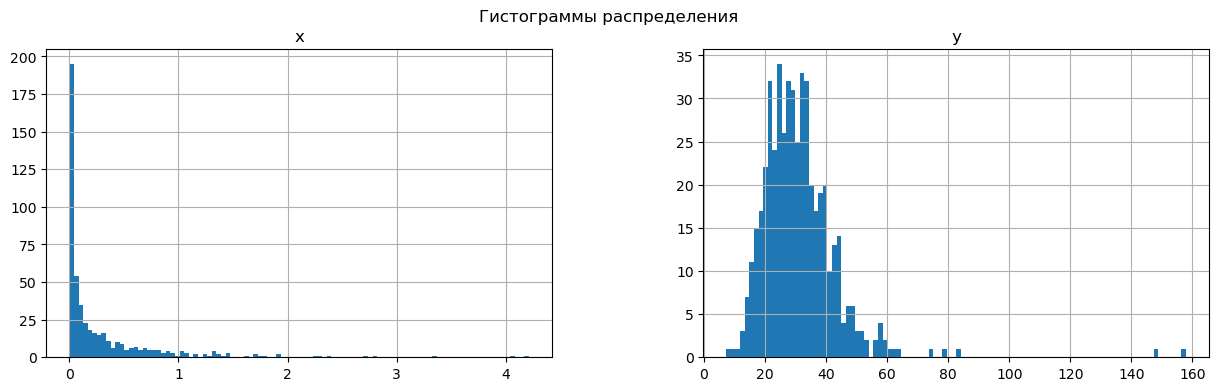

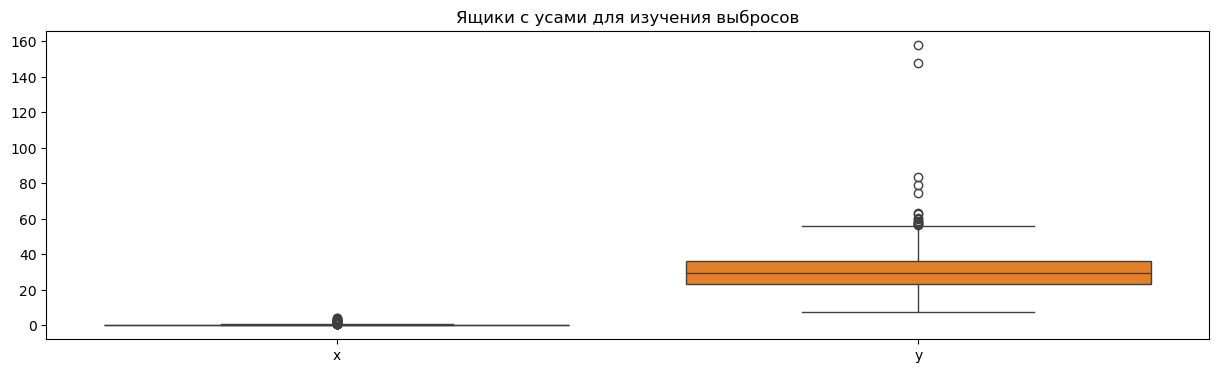

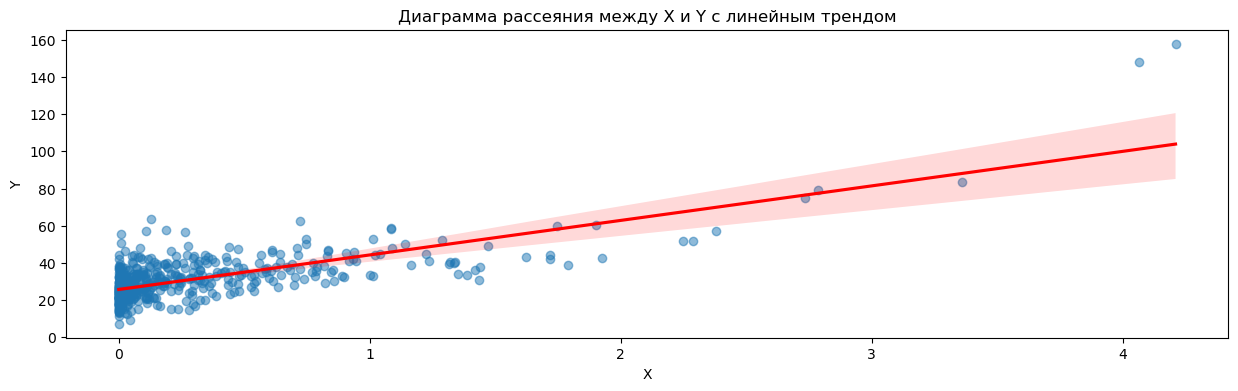

На основе графиков, целесообразно использовать корреляцию Спирмена, так как распределения неоднородные и не наблюдается линейного тренда


In [196]:
# КРИТЕРИЙ 3
# проверка, что все элементы - численного типа
print(df2.dtypes)

# построение гистограмм распределения
df2.hist(bins=100, figsize=(15, 4))
plt.suptitle('Гистограммы распределения')
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(15, 4))
sns.boxplot(data=df2)
plt.title('Ящики с усами для изучения выбросов')
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(15, 4))
sns.regplot(x='x', y='y', data=df2, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Диаграмма рассеяния между X и Y с линейным трендом')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков
print("На основе графиков, целесообразно использовать корреляцию Спирмена, так как распределения неоднородные и не наблюдается линейного тренда")

In [198]:
# КРИТЕРИЙ 4
# расчет коэффициента Спирмена
rho, p = stats.spearmanr(df2.iloc[:, 0], df2.iloc[:, 1])
print(f'Коэффициент Спирмена: {rho:.3f}')
print(f'p-значение: {p:.3f}')

# расчет t-критерия
n = len(df2['x'])  # количество наблюдений
t_stat = rho * np.sqrt((n - 2) / (1 - rho**2))
print(f"t-статистика: {t_stat:.3f}")

# Определение t критического
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, n - 2)  # двусторонний тест
print(f"t-критическое: {t_crit:.3f}")

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 
if abs(t_stat) > t_crit:
    print(f"Взаимосвязь статистически значима для альфа = {alpha}")
else:
    print(f"Взаимосвязь статистически не значима для альфа = {alpha}")
if p_value < alpha:
    print(f"p-значение указывает на статистическую значимость взаимосвязи для альфа = {alpha}.")
else:
    print(f"p-значение указывает на отсутствие статистической значимости взаимосвязидля альфа = {alpha}.")
if abs(rho) > 0.5:
    print('Сильная корреляция')
elif 0.3 < abs(rho) <= 0.5:
    print('Умеренная корреляция')
else:
    print('Слабая корреляция')

Коэффициент Спирмена: 0.617
p-значение: 0.000
t-статистика: 17.500
t-критическое: 1.965
Взаимосвязь статистически значима для альфа = 0.05
p-значение указывает на статистическую значимость взаимосвязи для альфа = 0.05.
Сильная корреляция


Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [201]:
# считывание файла
df3 = pd.read_csv('ex3.csv')
print(df3.head())

          x          y
0  2.479574  -1.684842
1 -0.630393   7.177759
2  7.976611 -16.409053
3 -4.219019  13.915459
4 -1.681153  10.373936


x    float64
y    float64
dtype: object


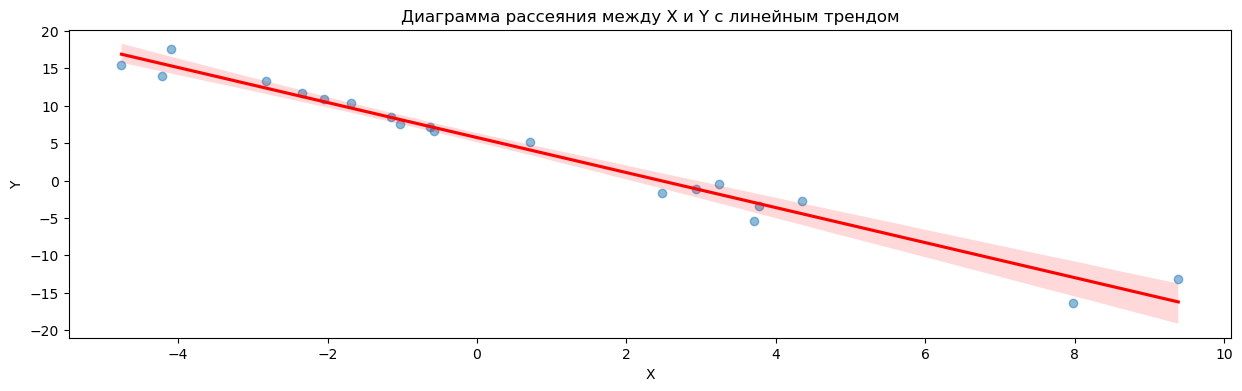

На диаграмме рассеяния наблюдается линейный тренд, поэтому целесообразно использовать корреляцию Пирсона.
Коэффициент корреляции Пирсона: -0.985
p-значение: 0.000


In [156]:
# КРИТЕРИЙ 5
print(df3.dtypes)
# построение диаграммы рассеяния
plt.figure(figsize=(15, 4))
sns.regplot(x='x', y='y', data=df3, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Диаграмма рассеяния между X и Y с линейным трендом')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
# вывод о целесообразности использования корреляции Пирсона
print("На диаграмме рассеяния наблюдается линейный тренд, поэтому целесообразно использовать корреляцию Пирсона.")
# расчет коэффициента Пирсона
pearson_corr, p_value = stats.pearsonr(df3['x'], df3['y'])
print(f"Коэффициент корреляции Пирсона: {pearson_corr:.3f}")
print(f"p-значение: {p_value:.3f}")

Коэффициент b0: 5.741
Коэффициент b1: -2.339


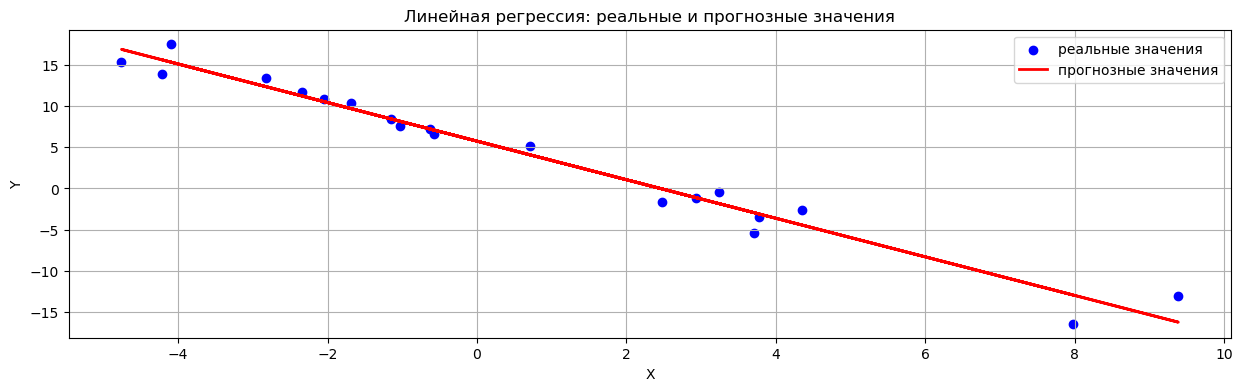

In [170]:
# КРИТЕРИЙ 6
# расчет коэффициентов линейной регрессии
X = df3.iloc[:, 0].values.reshape(-1, 1)
y = df3.iloc[:, 1].values.reshape(-1, 1)
lr_model = LinearRegression()
lr_model.fit(X, y)
b0, b1 = lr_model.intercept_[0], lr_model.coef_[0][0]
print(f'Коэффициент b0: {b0:.3f}')
print(f'Коэффициент b1: {b1:.3f}')
# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
plt.figure(figsize=(15, 4))
plt.scatter(X, y, color='blue', label='реальные значения')  # Реальные значения
plt.plot(X, y_pred, color='red', label='прогнозные значения', linewidth=2)  # Линия предсказания
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная регрессия: реальные и прогнозные значения')
plt.legend()
plt.grid()
plt.show()

In [172]:
# КРИТЕРИЙ 7
# расчет средней ошибки аппроксимации
mse = np.mean((y - y_pred) ** 2)
print(f'Средняя ошибка аппроксимации: {mse:.3f}')

Средняя ошибка аппроксимации: 2.466


In [174]:
# КРИТЕРИЙ 8
# расчет F-критерия
from scipy.stats import f
F = (np.var(y_pred) / np.var(y)) * (len(y) - 2) / 2
p_F = f.sf(F, 1, len(y) - 2)
print(f'F-критерий: {F:.3f}')
print(f'p-значение F-критерия: {p_F:.3f}')

# вывод о статистической значимости уравнения в целом
if p_F < 0.05:
    print('Уравнение статистически значимо')
else:
    print('Уравнение статистически не значимо')

F-критерий: 8.735
p-значение F-критерия: 0.008
Уравнение статистически значимо


In [180]:
# КРИТЕРИЙ 9
# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
se_b0 = np.sqrt(mse / len(y)) * np.sqrt(1 + (np.mean(X) ** 2) / np.sum((X - np.mean(X)) ** 2))
se_b1 = np.sqrt(mse / np.sum((X - np.mean(X)) ** 2))
print(f'Стандартная ошибка b0: {se_b0:.3f}')
print(f'Стандартная ошибка b1: {se_b1:.3f}')

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1
print(f't-критерий b0: {t_b0:.3f}')
print(f't-критерий b1: {t_b1:.3f}')

# вывод о статистической значимости коэффициентов регрессии
if abs(t_b0) > stats.t.ppf(1 - 0.05/2, len(y) - 2):
    print('Коэффициент b0 статистически значим')
else:
    print('Коэффициент b0 статистически не значим')

if abs(t_b1) > stats.t.ppf(1 - 0.05/2, len(y) - 2):
    print('Коэффициент b1 статистически значим')
else:
    print('Коэффициент b1 статистически не значим')
# запись диапазона коэффицентов регрессии
print(f'Диапазон коэффициента b0: ({b0 - 1.96 * se_b0:.3f}, {b0 + 1.96 * se_b0:.3f})')
print(f'Диапазон коэффициента b1: ({b1 - 1.96 * se_b1:.3f}, {b1 + 1.96 * se_b1:.3f})')

Стандартная ошибка b0: 0.351
Стандартная ошибка b1: 0.091
t-критерий b0: 16.338
t-критерий b1: -25.653
Коэффициент b0 статистически значим
Коэффициент b1 статистически значим
Диапазон коэффициента b0: (5.052, 6.429)
Диапазон коэффициента b1: (-2.518, -2.160)


In [203]:
# КРИТЕРИЙ 10
# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6
y_pred_x0 = b0 + b1 * x0
se_pred = np.sqrt(mse * (1 + 1/len(y) + ((x0 - np.mean(X)) ** 2) / np.sum((X - np.mean(X)) ** 2)))
print(f'Интервальная оценка для y при x0 = 6: ({y_pred_x0 - 1.96 * se_pred:.3f}, {y_pred_x0 + 1.96 * se_pred:.3f})')

Интервальная оценка для y при x0 = 6: (-11.589, -4.999)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [218]:
# считывание файла
df4 = pd.read_csv('ex4.csv')
print(df4.head())

          x1         x2           y
0  13.637973  12.069977   -9.893143
1  -6.443507  23.970769  137.003862
2   9.361274  14.760979   20.571415
3   1.619709  24.043092   93.407384
4  -1.050608  21.837863   95.041511


x1    float64
x2    float64
y     float64
dtype: object


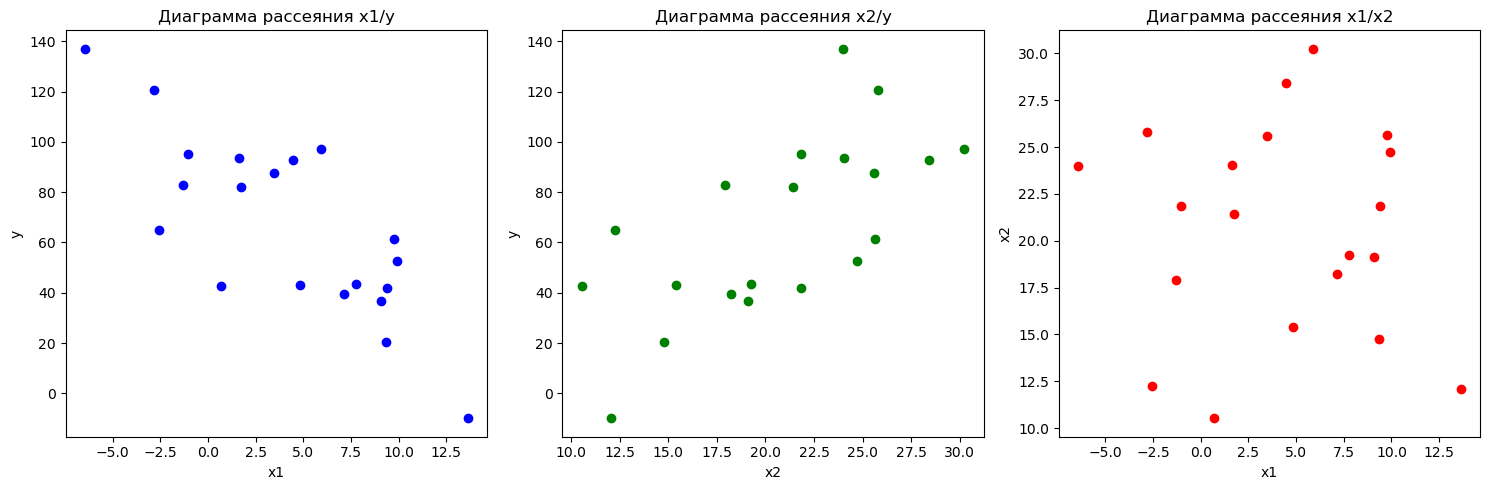

Корректность использования модели множественной регрессии будет оценена по коэффициентам корреляции.
Коэффициенты корреляции:
           x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000
Необходимо проверить наличие мультиколлинеарности между факторами.


In [222]:
# КРИТЕРИЙ 11
print(df4.dtypes)
# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(15, 5))

# Диаграмма рассеяния x1/y
plt.subplot(1, 3, 1)
plt.scatter(df4['x1'], df4['y'], color='blue')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Диаграмма рассеяния x1/y')

# Диаграмма рассеяния x2/y
plt.subplot(1, 3, 2)
plt.scatter(df4['x2'], df4['y'], color='green')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Диаграмма рассеяния x2/y')

# Диаграмма рассеяния x1/x2
plt.subplot(1, 3, 3)
plt.scatter(df4['x1'], df4['x2'], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Диаграмма рассеяния x1/x2')

plt.tight_layout()
plt.show()

# вывод о корректности использования модели множественной регрессии
print("Корректность использования модели множественной регрессии будет оценена по коэффициентам корреляции.")

# расчет коэффициентов корреляции
correlation_matrix = df4.corr()
print("Коэффициенты корреляции:\n", correlation_matrix)

# вывод о необходимости устранения какого-либо фактора
if abs(correlation_matrix['y']['x1']) > 0.7 or abs(correlation_matrix['y']['x2']) > 0.7:
    print("Необходимо проверить наличие мультиколлинеарности между факторами.")
else:
    print("Факторы не имеют сильной корреляции, модель может быть использована.")

In [230]:
# КРИТЕРИЙ 12
# расчет стандартных коэффицентов регрессии
X = df4[['x1', 'x2']]
y = df4['y']
X = sm.add_constant(X)  # Добавление константы

# Модель множественной регрессии
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1993.
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           6.90e-21
Time:                        18:14:51   Log-Likelihood:                -44.683
No. Observations:                  20   AIC:                             95.37
Df Residuals:                      17   BIC:                             98.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7221      2.223      3.024      0.0

Коэффициенты 'чистой' регрессии:
 const    6.722076
x1      -4.917385
x2       3.892685
dtype: float64


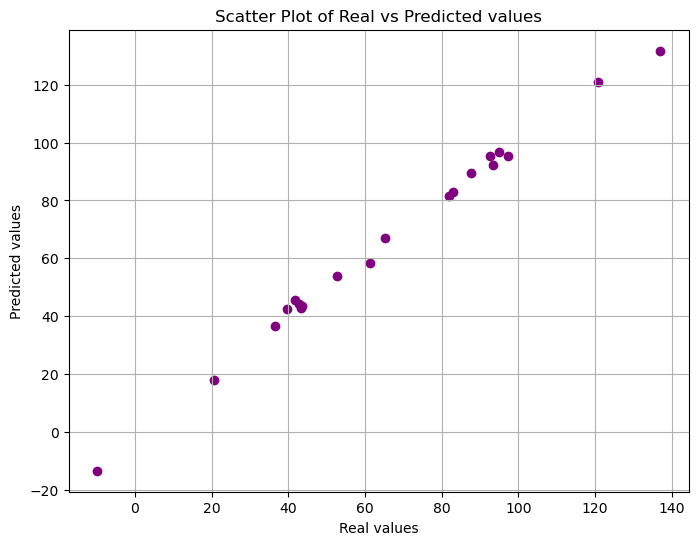

In [238]:
# КРИТЕРИЙ 13
# расчет коэффициентов "чистой" регрессии
clean_coefficients = model.params
print("Коэффициенты 'чистой' регрессии:\n", clean_coefficients)
# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
y_pred = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='purple')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Scatter Plot of Real vs Predicted values')
plt.grid()
plt.show()

In [240]:
# КРИТЕРИЙ 14
# Расчет индекса множественной корреляции
multiple_correlation_index = np.sqrt(model.rsquared)
print(f"Индекс множественной корреляции: {multiple_correlation_index:.3f}")

# Расчет F-критерия
f_value = model.fvalue
p_value_f = model.f_pvalue
print(f"F-критерий: {f_value:.3f}")
print(f"p-значение F-критерия: {p_value_f:.3f}")

# Вывод о статистической значимости уравнения в целом
if p_value_f < 0.05:
    print("Уравнение статистически значимо.")
else:
    print("Уравнение статистически не значимо.")

Индекс множественной корреляции: 0.998
F-критерий: 1992.698
p-значение F-критерия: 0.000
Уравнение статистически значимо.


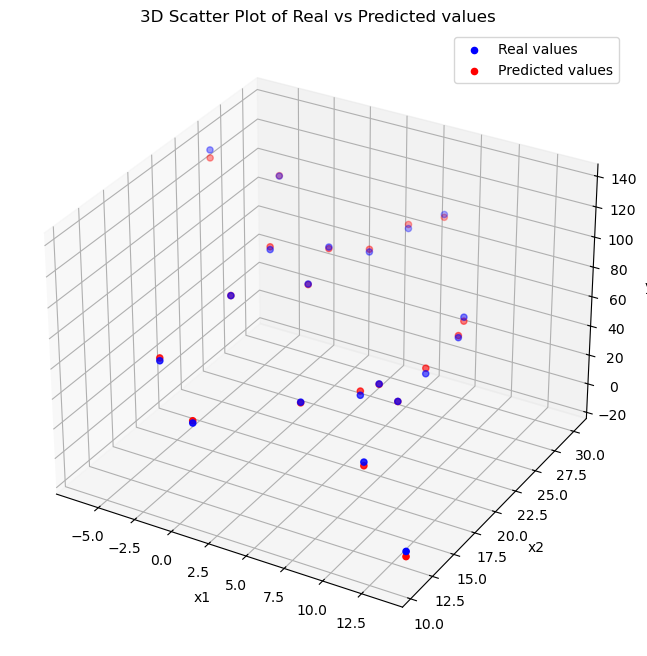

In [242]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Реальные значения
ax.scatter(df4['x1'], df4['x2'], y, color='blue', label='Real values')

# Прогнозные значения
ax.scatter(df4['x1'], df4['x2'], y_pred, color='red', label='Predicted values')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Real vs Predicted values')
ax.legend()
plt.show()